## HousePrice Prediction using MachineLearning

## Importing the required Libraries

In [89]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load  the Dataset - USA Housing Dataset

In [90]:
data=pd.read_csv("USA_Housing.csv")
data.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,NaN,4.988408,NaN,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,NaN,6.025336,NaN,3.41,60828.24909,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,NaN,6.989780,NaN,2.42,36516.35897,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,NaN,5.362126,NaN,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,NaN,4.423672,NaN,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


### Basic info about the dataset

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [92]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


### Data Visualization

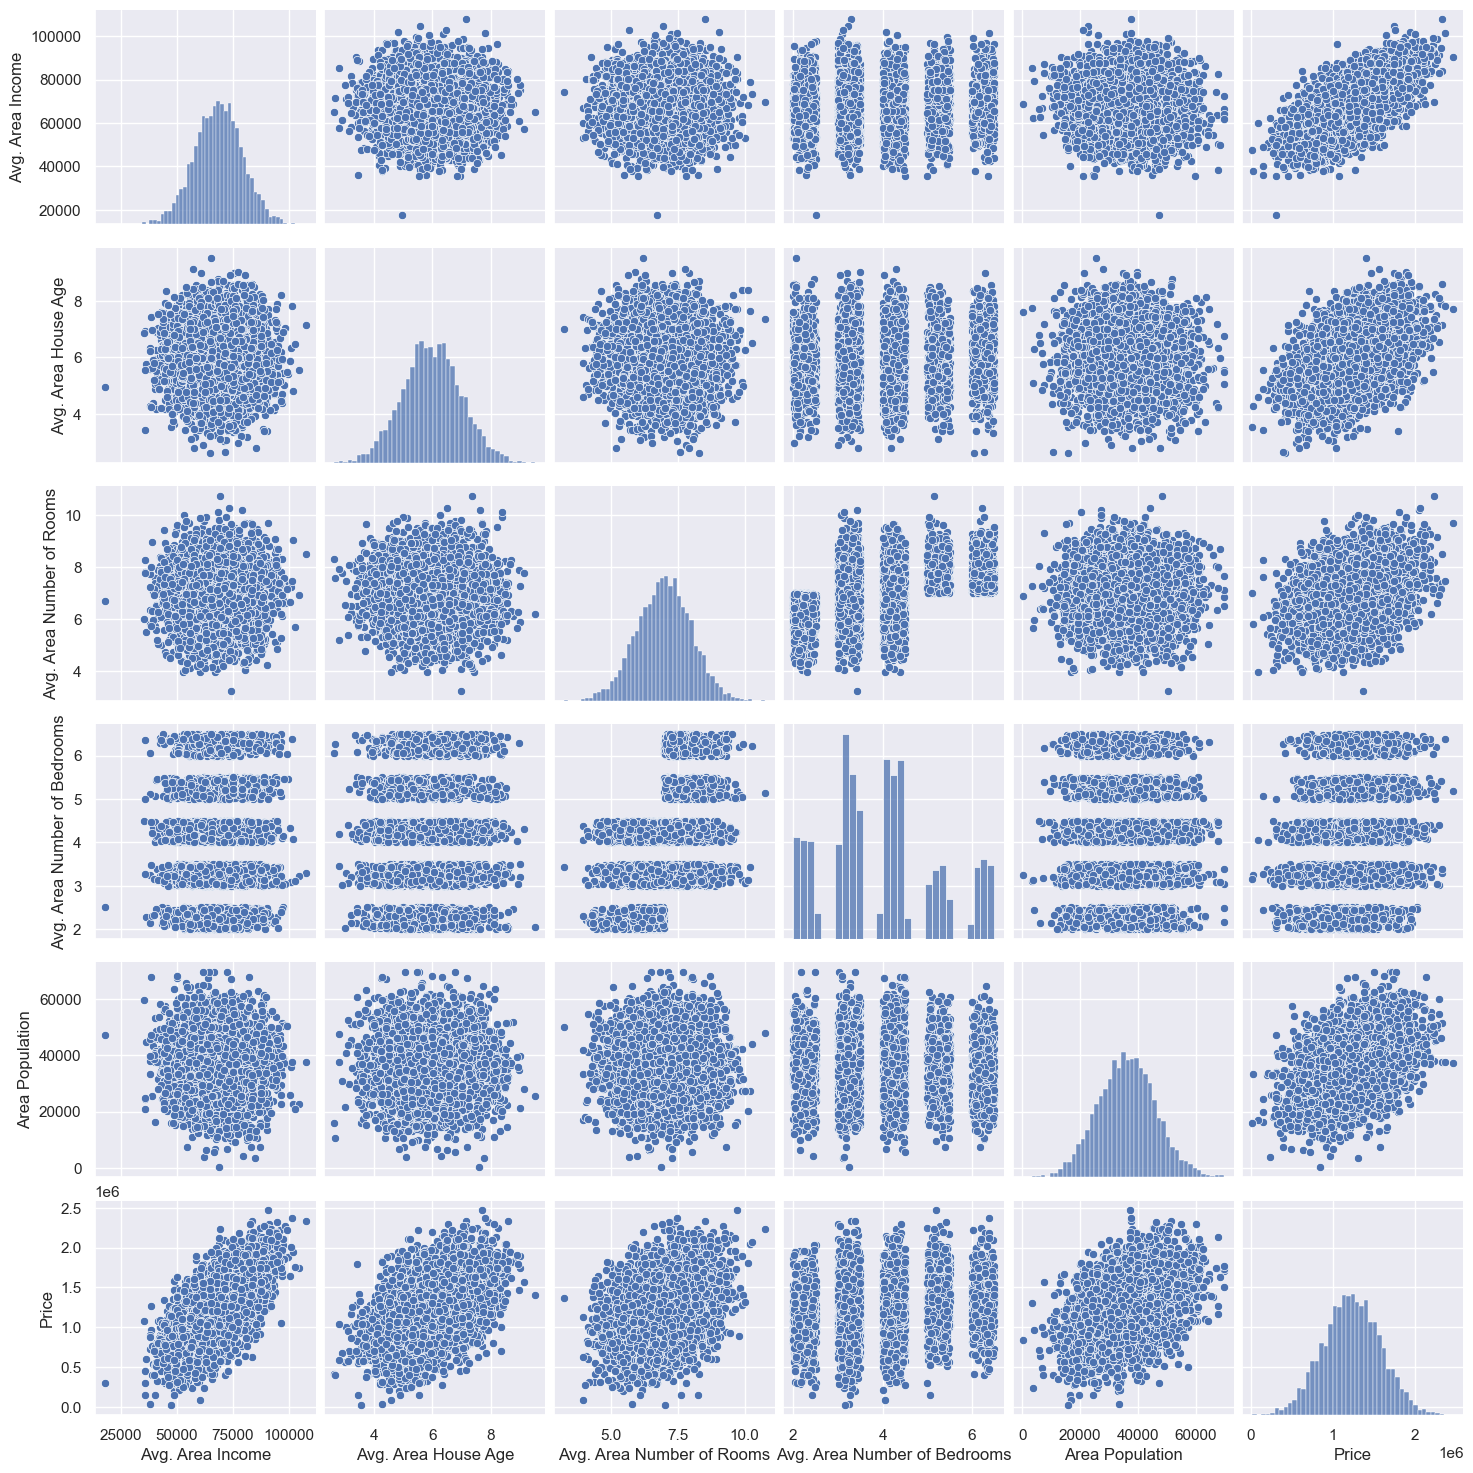

In [93]:
sns.pairplot(data)
plt.show()

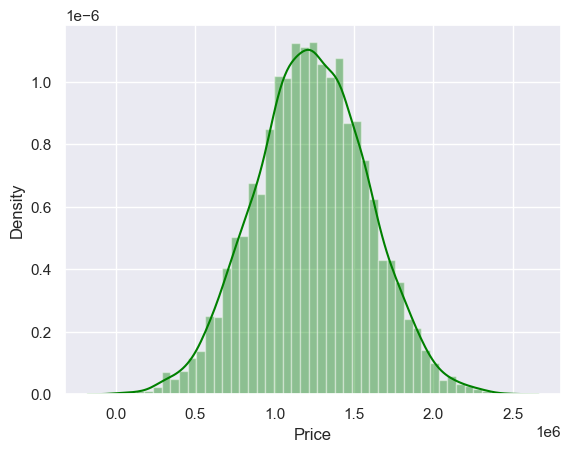

In [94]:
sns.distplot(data['Price'],color='green')
plt.show()

## Data Pre Processing

In [ ]:
### It involves cleaning and transforming raw data to make it suitable for analysis.
### Checking and removing duplicate values.
### Check for missing values and treat them
### Check for outliers and treat them

## Checking duplicate values

In [95]:
data.duplicated().sum()

0

In [ ]:
## Drop variable
### Avg. Area Number of Bedrooms as Avg. Area Number of Rooms is also given

In [96]:
data=data.drop(['Avg. Area Number of Bedrooms'],axis=1)

## Checking missing Values

In [97]:
data.isnull().sum()

Avg. Area Income             10
Avg. Area House Age           0
Avg. Area Number of Rooms     5
Area Population               0
Price                         0
Address                       0
dtype: int64

In [98]:
data.isnull().sum()/len(data)*100

Avg. Area Income             0.2
Avg. Area House Age          0.0
Avg. Area Number of Rooms    0.1
Area Population              0.0
Price                        0.0
Address                      0.0
dtype: float64

### Checking Outliers

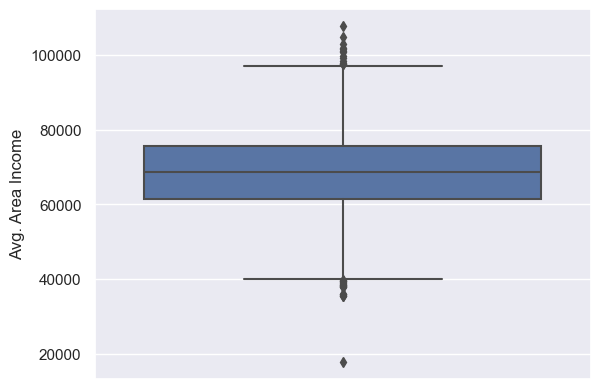

In [99]:
sns.boxplot(y='Avg. Area Income',data=data)## here data means the dataset that has been loaded
plt.show()

In [100]:
data['Avg. Area Income']=data['Avg. Area Income'].fillna(data['Avg. Area Income'].median())

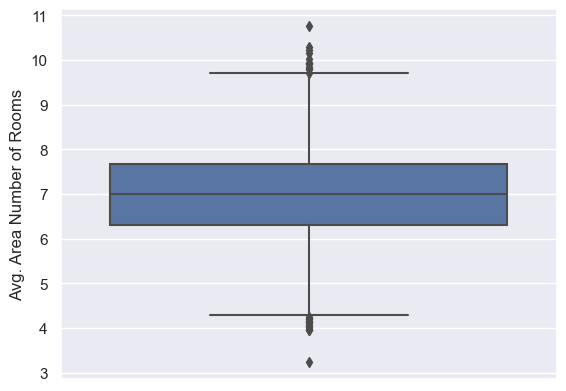

In [101]:
sns.boxplot(y='Avg. Area Number of Rooms',data=data)
plt.show()

In [102]:
data['Avg. Area Number of Rooms']=data['Avg. Area Number of Rooms'].fillna(data['Avg. Area Number of Rooms'].median())

In [103]:
data.isnull().sum()

Avg. Area Income             0
Avg. Area House Age          0
Avg. Area Number of Rooms    0
Area Population              0
Price                        0
Address                      0
dtype: int64

## Label Encoder

In [104]:
data['Address']=data['Address'].astype('category')
data['Address']=data['Address'].cat.codes

## ANOVA Testing

In [ ]:
### ANOVA abbreviates for Analysis of Variance. It is one of the statistical tests that opted to study the
## statistical differences between both numerical and categorical sets of features of the data. It generally
### tries to decode the correlation among the various features of the data.

In [105]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('Price ~ Address',data=data).fit()
anova_result=sm.stats.anova_lm(model,type=2)
print(anova_result)

              df        sum_sq       mean_sq         F    PR(>F)
Address      1.0  4.729103e+10  4.729103e+10  0.379215  0.538051
Residual  4998.0  6.232883e+14  1.247075e+11       NaN       NaN


In [106]:
data=data.iloc[:,0:-1]

In [107]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05


## Checking for Outliers

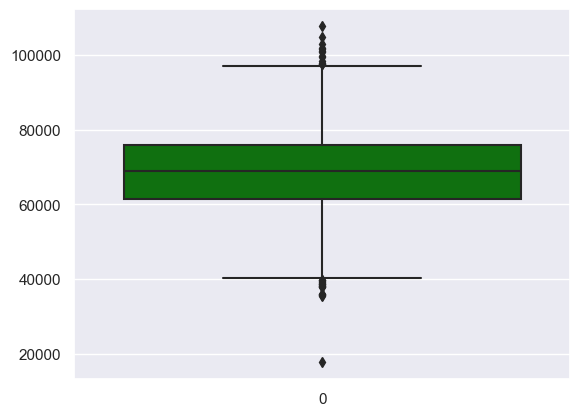

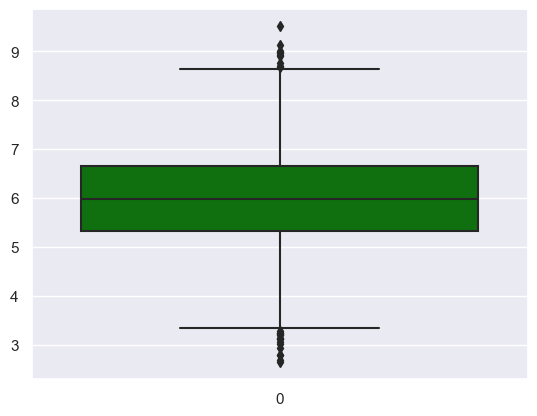

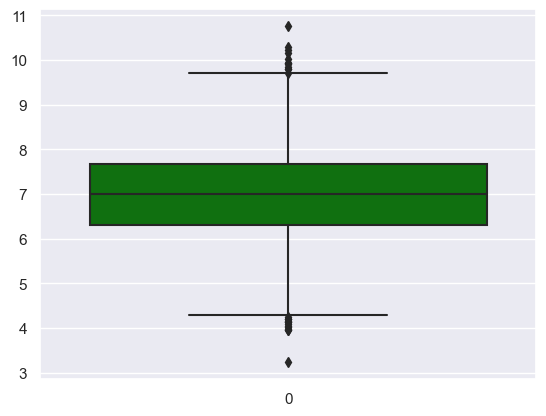

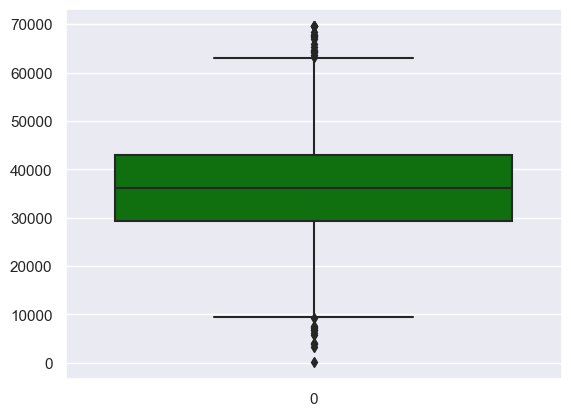

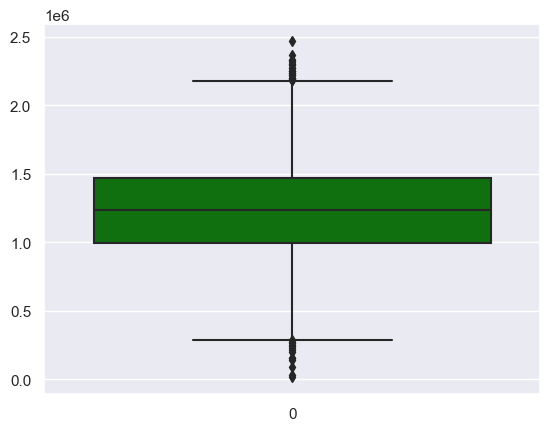

In [108]:
def boxplots(col):
    sns.boxplot(data[col],color='green')
    plt.show()
for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

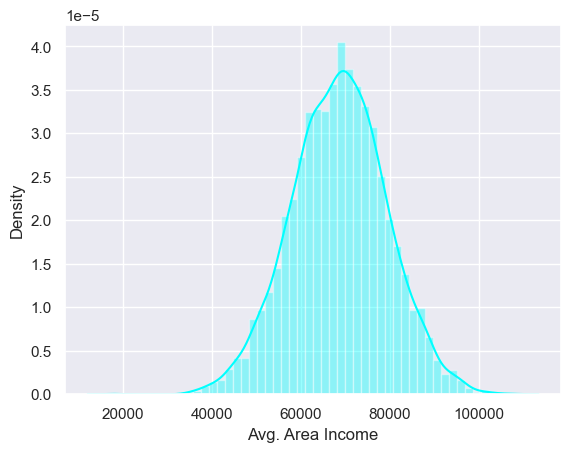

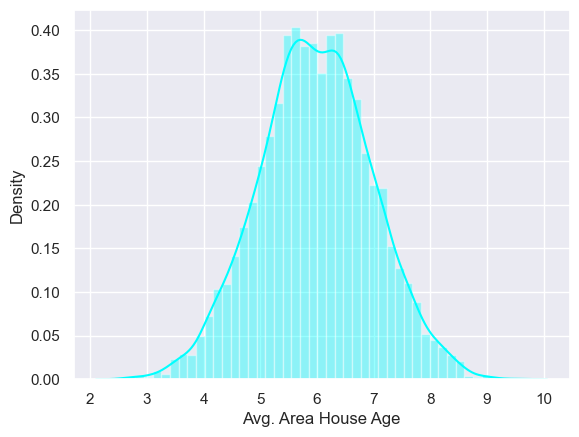

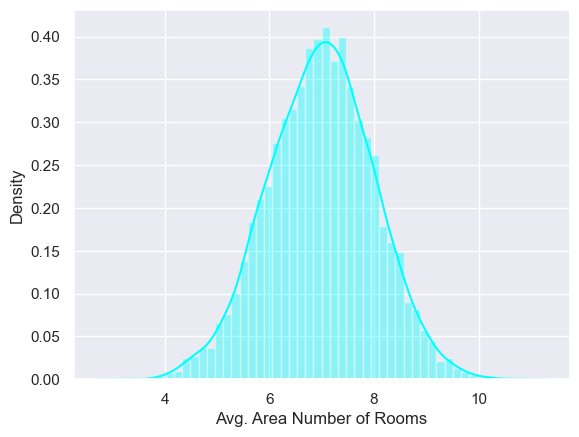

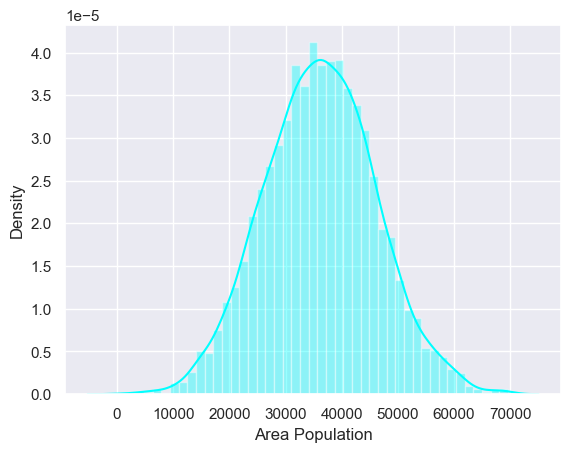

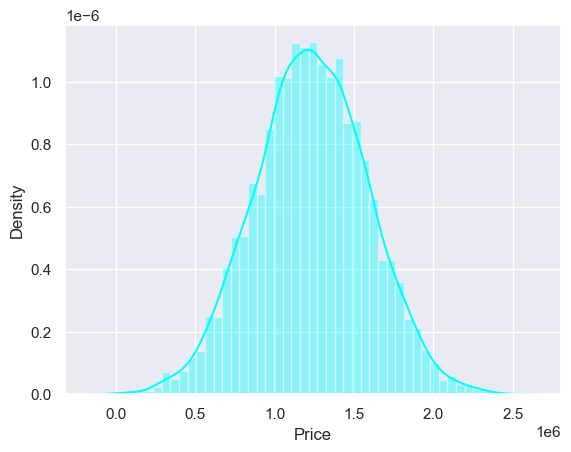

In [109]:
def distplots(col):
    sns.distplot(data[col],color='aqua')
    plt.show()
for i in list(data.columns)[0:]:
    distplots(i)

## Handle Outliers 
### Capping Method

In [110]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price'],
      dtype='object')

In [111]:
#Avg. Area Income
income_q1=data['Avg. Area Income'].quantile(0.25)
income_q3=data['Avg. Area Income'].quantile(0.75)
income_iqr=income_q3-income_q1
income_upper= income_q3 +1.5*income_iqr
income_lower= income_q1- 1.5 *income_iqr

In [112]:
data['Avg. Area Income']=np.where(data['Avg. Area Income']>income_upper,income_upper,
np.where(data['Avg. Area Income']<income_lower,income_lower,
data['Avg. Area Income']))

In [113]:
#Avg. Area House Age
age_q1=data['Avg. Area House Age'].quantile(0.25)
age_q3=data['Avg. Area House Age'].quantile(0.75)
age_iqr=age_q3-age_q1
age_upper= age_q3 +1.5*age_iqr
age_lower= age_q1- 1.5 *age_iqr

In [114]:
data['Avg. Area House Age']=np.where(data['Avg. Area House Age']>age_upper,age_upper,
np.where(data['Avg. Area House Age']<age_lower,age_lower,
data['Avg. Area House Age']))

In [115]:
#Avg. Area Number of Rooms
room_q1=data['Avg. Area Number of Rooms'].quantile(0.25)
room_q3=data['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr=room_q3-room_q1
room_upper= room_q3 +1.5*room_iqr
room_lower= room_q1- 1.5 *room_iqr

In [116]:
data['Avg. Area Number of Rooms']=np.where(data['Avg. Area Number of Rooms']>room_upper,room_upper,
np.where(data['Avg. Area Number of Rooms']<room_lower,room_lower,
data['Avg. Area Number of Rooms']))

In [117]:
#Area Population
pop_q1=data['Area Population'].quantile(0.25)
pop_q3=data['Area Population'].quantile(0.75)
pop_iqr=pop_q3-pop_q1
pop_upper= pop_q3 +1.5*pop_iqr
pop_lower= pop_q1- 1.5 *pop_iqr

In [118]:
data['Area Population']=np.where(data['Area Population']>pop_upper,pop_upper,
np.where(data['Area Population']<pop_lower,pop_lower,
data['Area Population']))

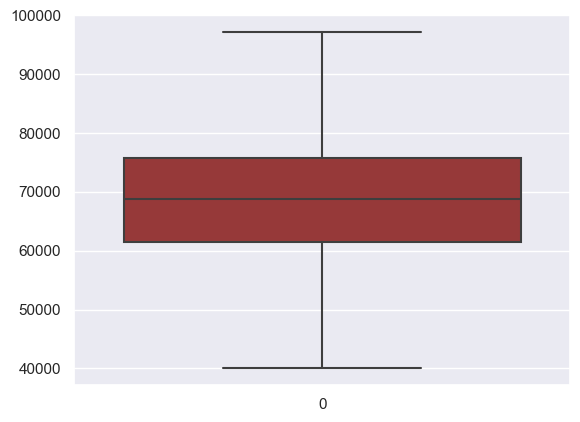

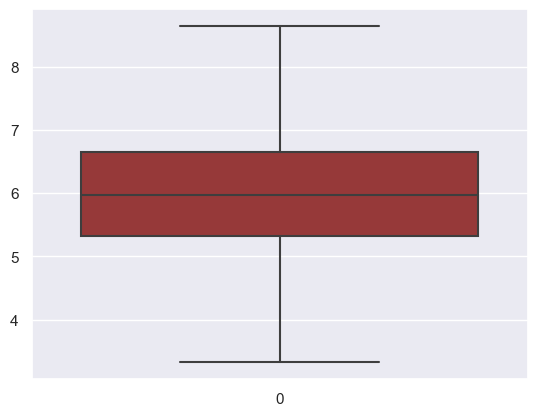

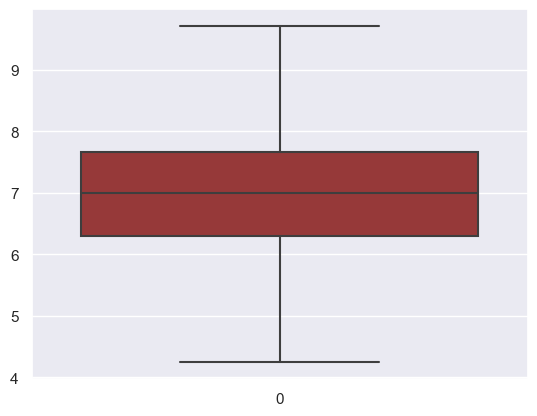

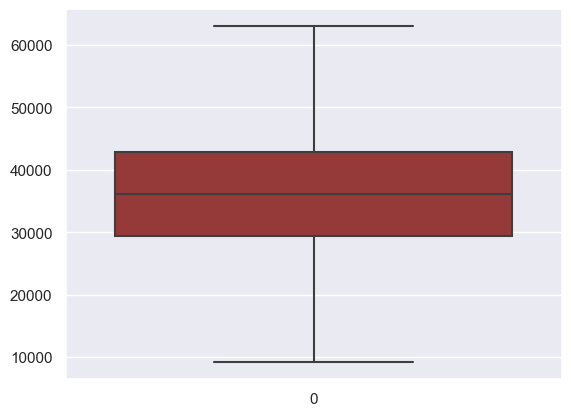

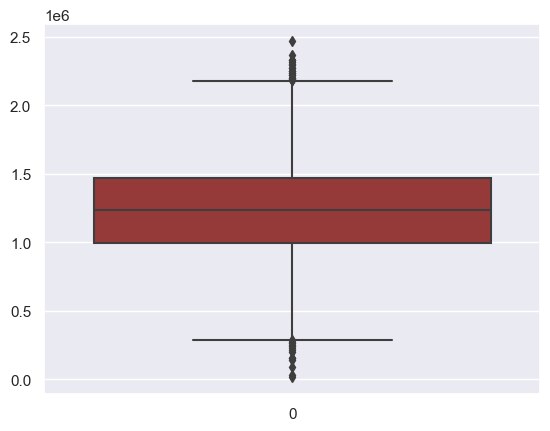

In [119]:
def boxplots(col):
    sns.boxplot(data[col],color='brown')
    plt.show()
for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

#### Split the data into independent variable and dependent variable

In [120]:
data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.45857,5.682861,7.009188,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,40173.07217,1505890.915


In [121]:
x=data.iloc[:,0:-1]
y=data['Price']

In [122]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [123]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

## Feature Scaling
#### Feature scaling is a method used to normalize the range of independent variables or features of data.
#### We can only do with independent variable not with dependent variable.

In [124]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3
0,1.036382,-0.298541,0.021620,-1.325622
1,1.008309,0.025747,-0.256381,0.407049
2,-0.690457,-0.113082,1.523179,0.073326
3,-0.495800,1.226822,-1.398967,-0.187484
4,-0.813869,-0.949376,0.850726,-0.994293
...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-1.350917
4996,0.936679,1.035210,-0.410236,-1.069131
4997,-0.491501,1.290004,-2.179585,-0.293363
4998,-0.055437,-0.448985,0.142416,0.655755


## Check Multicollinearity

### 1. Find the correlation
#### Heatmaps are a great way to show multicollinearity as it provides better visualization. The colors get darker as collinearity increases.

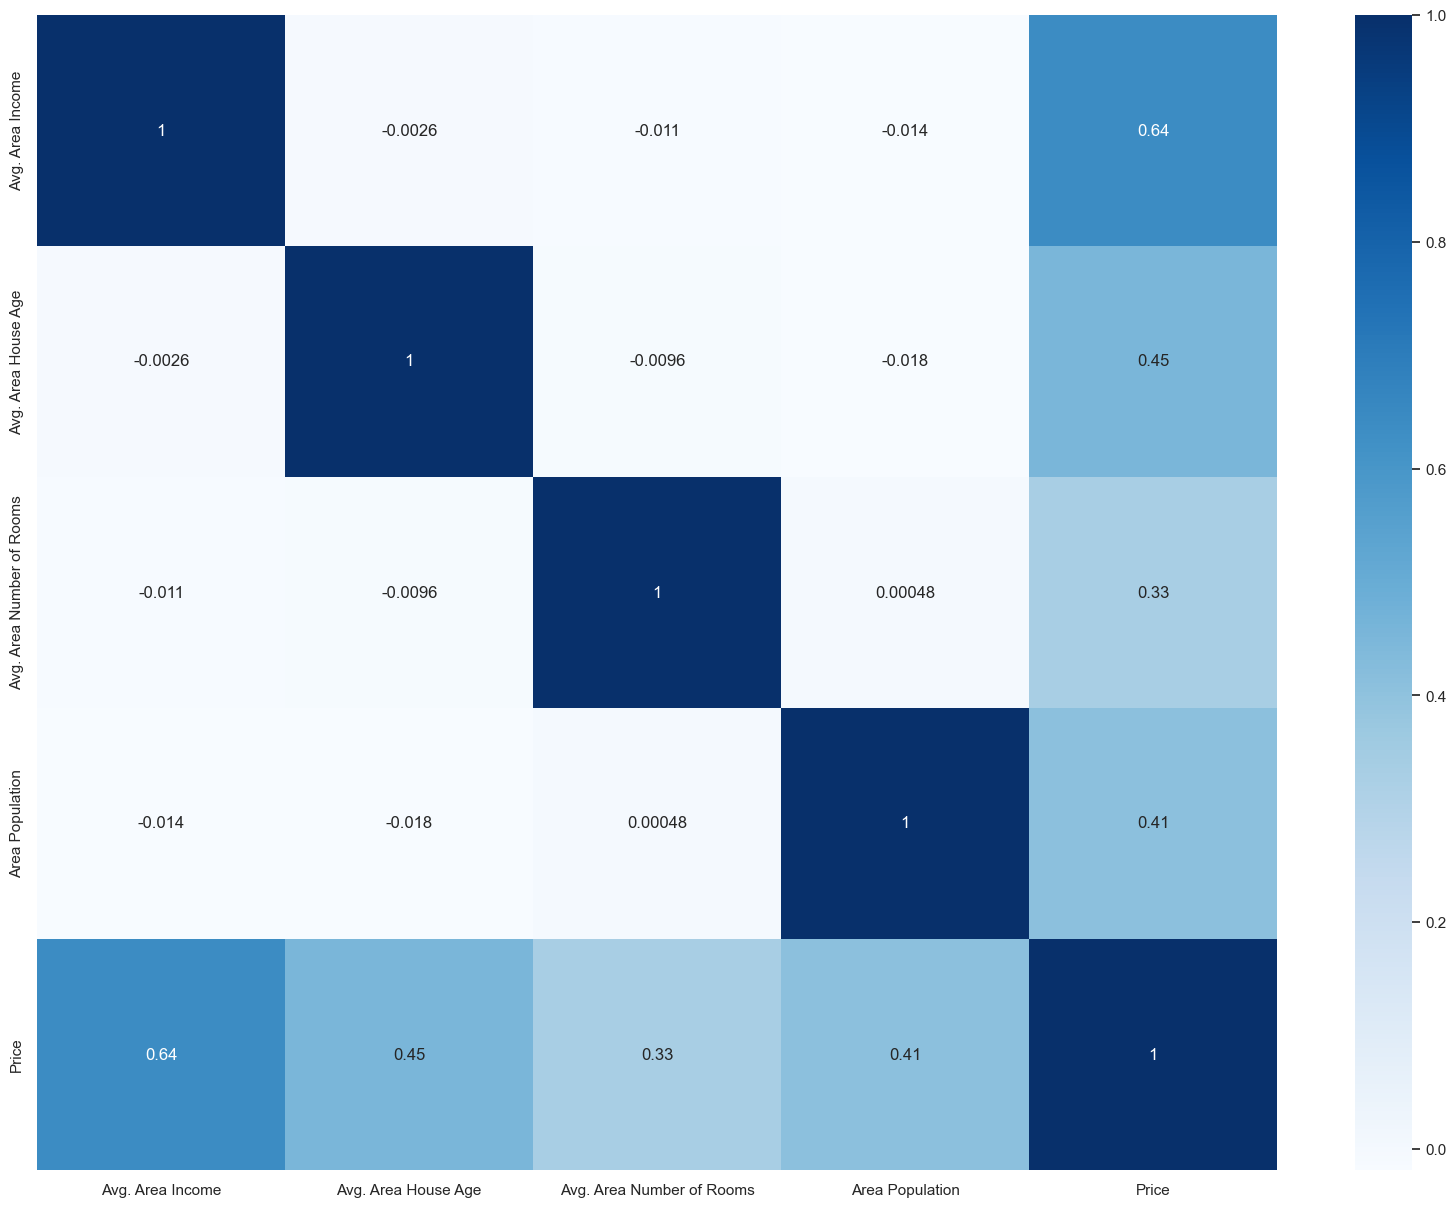

In [126]:
plt.figure(figsize=(20,15))
corr=data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

### 2. Variance Inflation factor (VIF) -
#### A variance inflation factor (VIF) provides a measure of multicollinearity among the independentvariables in a multiple regression model.
#### A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.
#### Usually, VIF equal to 1 = variables are not correlated, VIF between 1 and 5 = variables are moderately correlated ,VIF greater than 5 = variables are highly correlated

In [127]:
variable=sc_x
variable.shape

(5000, 4)

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x
vif=pd.DataFrame()
vif['Variance Inflation Factor'] =[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']=x.columns

In [129]:
vif

,Variance Inflation Factor,Features
0,1.000335,Avg. Area Income
1,1.000432,Avg. Area House Age
2,1.000214,Avg. Area Number of Rooms
3,1.000537,Area Population


#### *No multi collinearity found as all values are less than 5

#### Split the data into training and test

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


#### Building Linear Regression Model

In [131]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [132]:
print(lm.intercept_)
print()
print(lm.coef_)

-2658303.392038106

[2.17361819e+01 1.65748470e+05 1.22571682e+05 1.52958075e+01]


In [133]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

price=intercept+slope1*Avg. Area Income+slope2*Avg. Area House Age+ slope3*Avg. Area
Number of Rooms + slope4**Area Population

In [134]:
price=-2658303.392038106+2.17361819e+01*85000+1.65748470e+05*2+1.22571682e+05*3+1.52958075e+01*38000
price

469724.7404618938

#### Predict house price by using LR model with test dataset

In [135]:
y_pred_price =lm.predict(x_test)
y_pred_price_train=lm.predict(x_train)

In [136]:
y_pred_price

array([1258927.55438276,  818030.31383002, 1745948.45303454, ...,
       1119387.19935068,  717217.37633985, 1516456.6242839 ])

In [137]:
y_pred_price_train

array([ 976450.46193941, 1006891.19880824, 1309553.93680634, ...,
        976148.79235854,  921184.48675295, 2134163.10702162])

In [138]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1881    1.727211e+06
2800    1.707270e+06
1216    1.167450e+06
1648    7.241217e+05
3063    1.561234e+06
Name: Price, Length: 1250, dtype: float64

### Validate the actual price of test data and predicted price
#### By Sq. Loss function

In [139]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred_price)

0.913609424096595

In [140]:
r2_score (y_train,y_pred_price_train)

0.9164810029819419